In [14]:
import re
import numpy as np
from numba import jit
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fnmatch import fnmatch
import jieba
import jieba.posseg
import gensim
from gensim.models import word2vec

In [102]:
DATA_FILE = 'user_tag_query.10W.TRAIN' 
with open(DATA_FILE, 'r', encoding='gb18030') as f:
    lines = f.readlines()

In [103]:
user_id_list = []
age_list = []
gender_list = []
education_list = []
query_list = []

def parse_data():
    for line in lines:
        user_id, age, gender, education, *query_history = line.strip().split('\t')
        user_id_list.append(user_id)
        age_list.append(age)
        gender_list.append(gender)
        education_list.append(education)
        query_list.append(query_history)
    return

parse_data()

In [4]:
len(user_id_list) == len(age_list) == len(gender_list) == len(education_list) == len(query_list)

True

In [5]:
words_list = []
allowed_pos = ['a*', 'n*', 'v*', 'j*', 'i*']

for index, query_history in enumerate(query_list):
    term_searched = []
    for record in query_history:
        pairs = jieba.posseg.cut(record)
        for word, flag in pairs:
            if any(fnmatch(flag, pos) for pos in allowed_pos):
                term_searched.append(word)
    words_list.append(term_searched)
    
    if index % 5000 == 0:
        print(index)

import pickle

# save words to file
output = open('words_list.pkl', 'wb')
pickle.dump(words_list, output)
output.close()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\guanwei\AppData\Local\Temp\jieba.cache
Loading model cost 2.033 seconds.
Prefix dict has been built succesfully.


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000


In [2]:
import pickle

pkl_file = open('words_list.pkl', 'rb')
words_list = pickle.load(pkl_file)
pkl_file.close()

In [2]:
with open('stopwords.dat','r',encoding='utf-8') as fin:
    stop_words = fin.readlines()

In [3]:
stop_words_list = [word.strip() for word in stop_words]
stop_words_list.extend(['lex', '①①', '①②', '①③', '①④', '①⑤', '①⑥', '①⑦', '①⑧', '①⑨', '①ａ', '①ｂ', '①ｃ', '①ｄ', '①ｅ', '①ｆ', '①ｇ', '①ｈ', '①ｉ', '①ｏ', '②①', '②②', '②③', '②④', '②⑤', '②⑥', '②⑦', '②⑧', '②⑩', '②ａ', '②ｂ', '②ｄ', '②ｅ', '②ｆ', '②ｇ', '②ｈ', '②ｉ', '②ｊ', '③①', '③⑩', '③ａ', '③ｂ', '③ｃ', '③ｄ', '③ｅ', '③ｆ', '③ｇ', '③ｈ', '④ａ', '④ｂ', '④ｃ', '④ｄ', '④ｅ', '⑤ａ', '⑤ｂ', '⑤ｄ', '⑤ｅ', '⑤ｆ', '１２', 'ｌｉ', 'ｚｘｆｉｔｌ'])

In [5]:
data = [' '.join(record) for record in words_list]

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stop_words_list, max_features=100)
tf_idf = vectorizer.fit_transform(data)

In [29]:
tf_idf.shape

(99998, 100)

In [106]:
flatten_words_list = set()
for records in words_list:
    flatten_words_list.update(records)

len(flatten_words_list)

585728

In [7]:
from collections import Counter

freq = Counter(flatten_words_list)

In [37]:
import heapq

top1000 = heapq.nlargest(1000, freq, key=freq.get)
top1000 = [word for word in top1000 if len(word) >= 2]

In [38]:
with open ('freq_words.csv', 'w', encoding='UTF-8') as f:
    f.writelines(','.join(top1000))

In [4]:
import csv

with open('freq_words.csv', 'r') as f:
    reader = csv.reader(f)
    top1000 = list(reader)

In [6]:
' '.join(top1000[0])

'图片 手机 意思 小说 视频 下载 大全 电影 中国 世界 重生 百度 官网 英语 电视剧 游戏 查询 做法 倾城 荣耀 苹果 怀孕 时间 大学 王者 软件 微信 电脑 阅读 学院 漫画 全集 价格 成语 北京 英文 时候 免费 作用 宝宝 头像 英雄 穿越 系统 快递 歌词 功效 汽车 作文 照片 直播 电话 原因 方法 区别 招聘 症状 梦见 上海 女生 全文 攻略 名字 需要 歌曲 不能 没有 医院 动漫 少女 手游 好看 华为 职业 孕妇 皮肤 排行榜 有限公司 答案 观看 设置 乔任梁 联盟 个人资料 韩国 淘宝 公司 时刻表 故事 句子 小米 翻译 总裁 学校 爱情 男生 最好 日本 密码 考试 三星 老婆 老公 信用卡 广州 孩子 排名 地图 火车 空间 发型 月经 公交车 移动 适合 演员表 工作 深圳 杨洋 奥运会 东西 牌子 书包 生活 流量 音乐 银行 老师 网名 技术 公主 治疗 国家 女人 西安 美女 重庆 美国 都市 杭州 高铁 类似 中心 拼音 介绍 信息 专业 成都 图解 开头 路线 网络 三国 事件 传说 南京 郑爽 使用 喜欢 有没有 科技 邪恶 地址 笔记本 结婚 天津 不了 教师 头发 读音 简单 九门 作战 制作 搞笑 技巧 报价 武汉 支付宝 女孩 地铁 诛仙 结局 中学 小学 郑州 男人 地方 关系 王宝强 教育 幼儿园 快乐 女主 开学 贷款 身份证 面膜 颜色 完整版 传奇 品牌 明星 声音 天气预报 安卓 会员 教程 等于 活动 好玩 网站 衣服 显示 破解版 天气 属于 简介 组词 银行卡 好吃 上册 旅游 搭配 人生 腾讯 剧情 一般 沈阳 知道 减肥 学生 数学 眼睛 影响 安全 口袋妖怪 纹身 马蓉 摩托车 月饼 手术 表情 检查 城市 资源 标准 电视 宝贝 无限 肚子 火影忍者 青云 小孩 青春 安装 不会 情侣 广场 高清 国际 星座 香港 考研 男主 登录 申请 河南 济南 儿童 教学 校园 先锋 范冰冰 僵尸 旋风 山东 连接 集团 酒店 壁纸 最强 出来 生肖 结果 经典 火车票 条件 飞机 战争 教师节 兄弟 赵丽颖 爱奇艺 军训 骑士 路由器 青岛 恢复 推荐 诗句 人物 问题 长沙 设计 死亡 女友 峰会 离婚 多长时间 球球 平台 计划 梦幻 奥特曼 魅族 优酷 管理 社会 倩女幽魂 

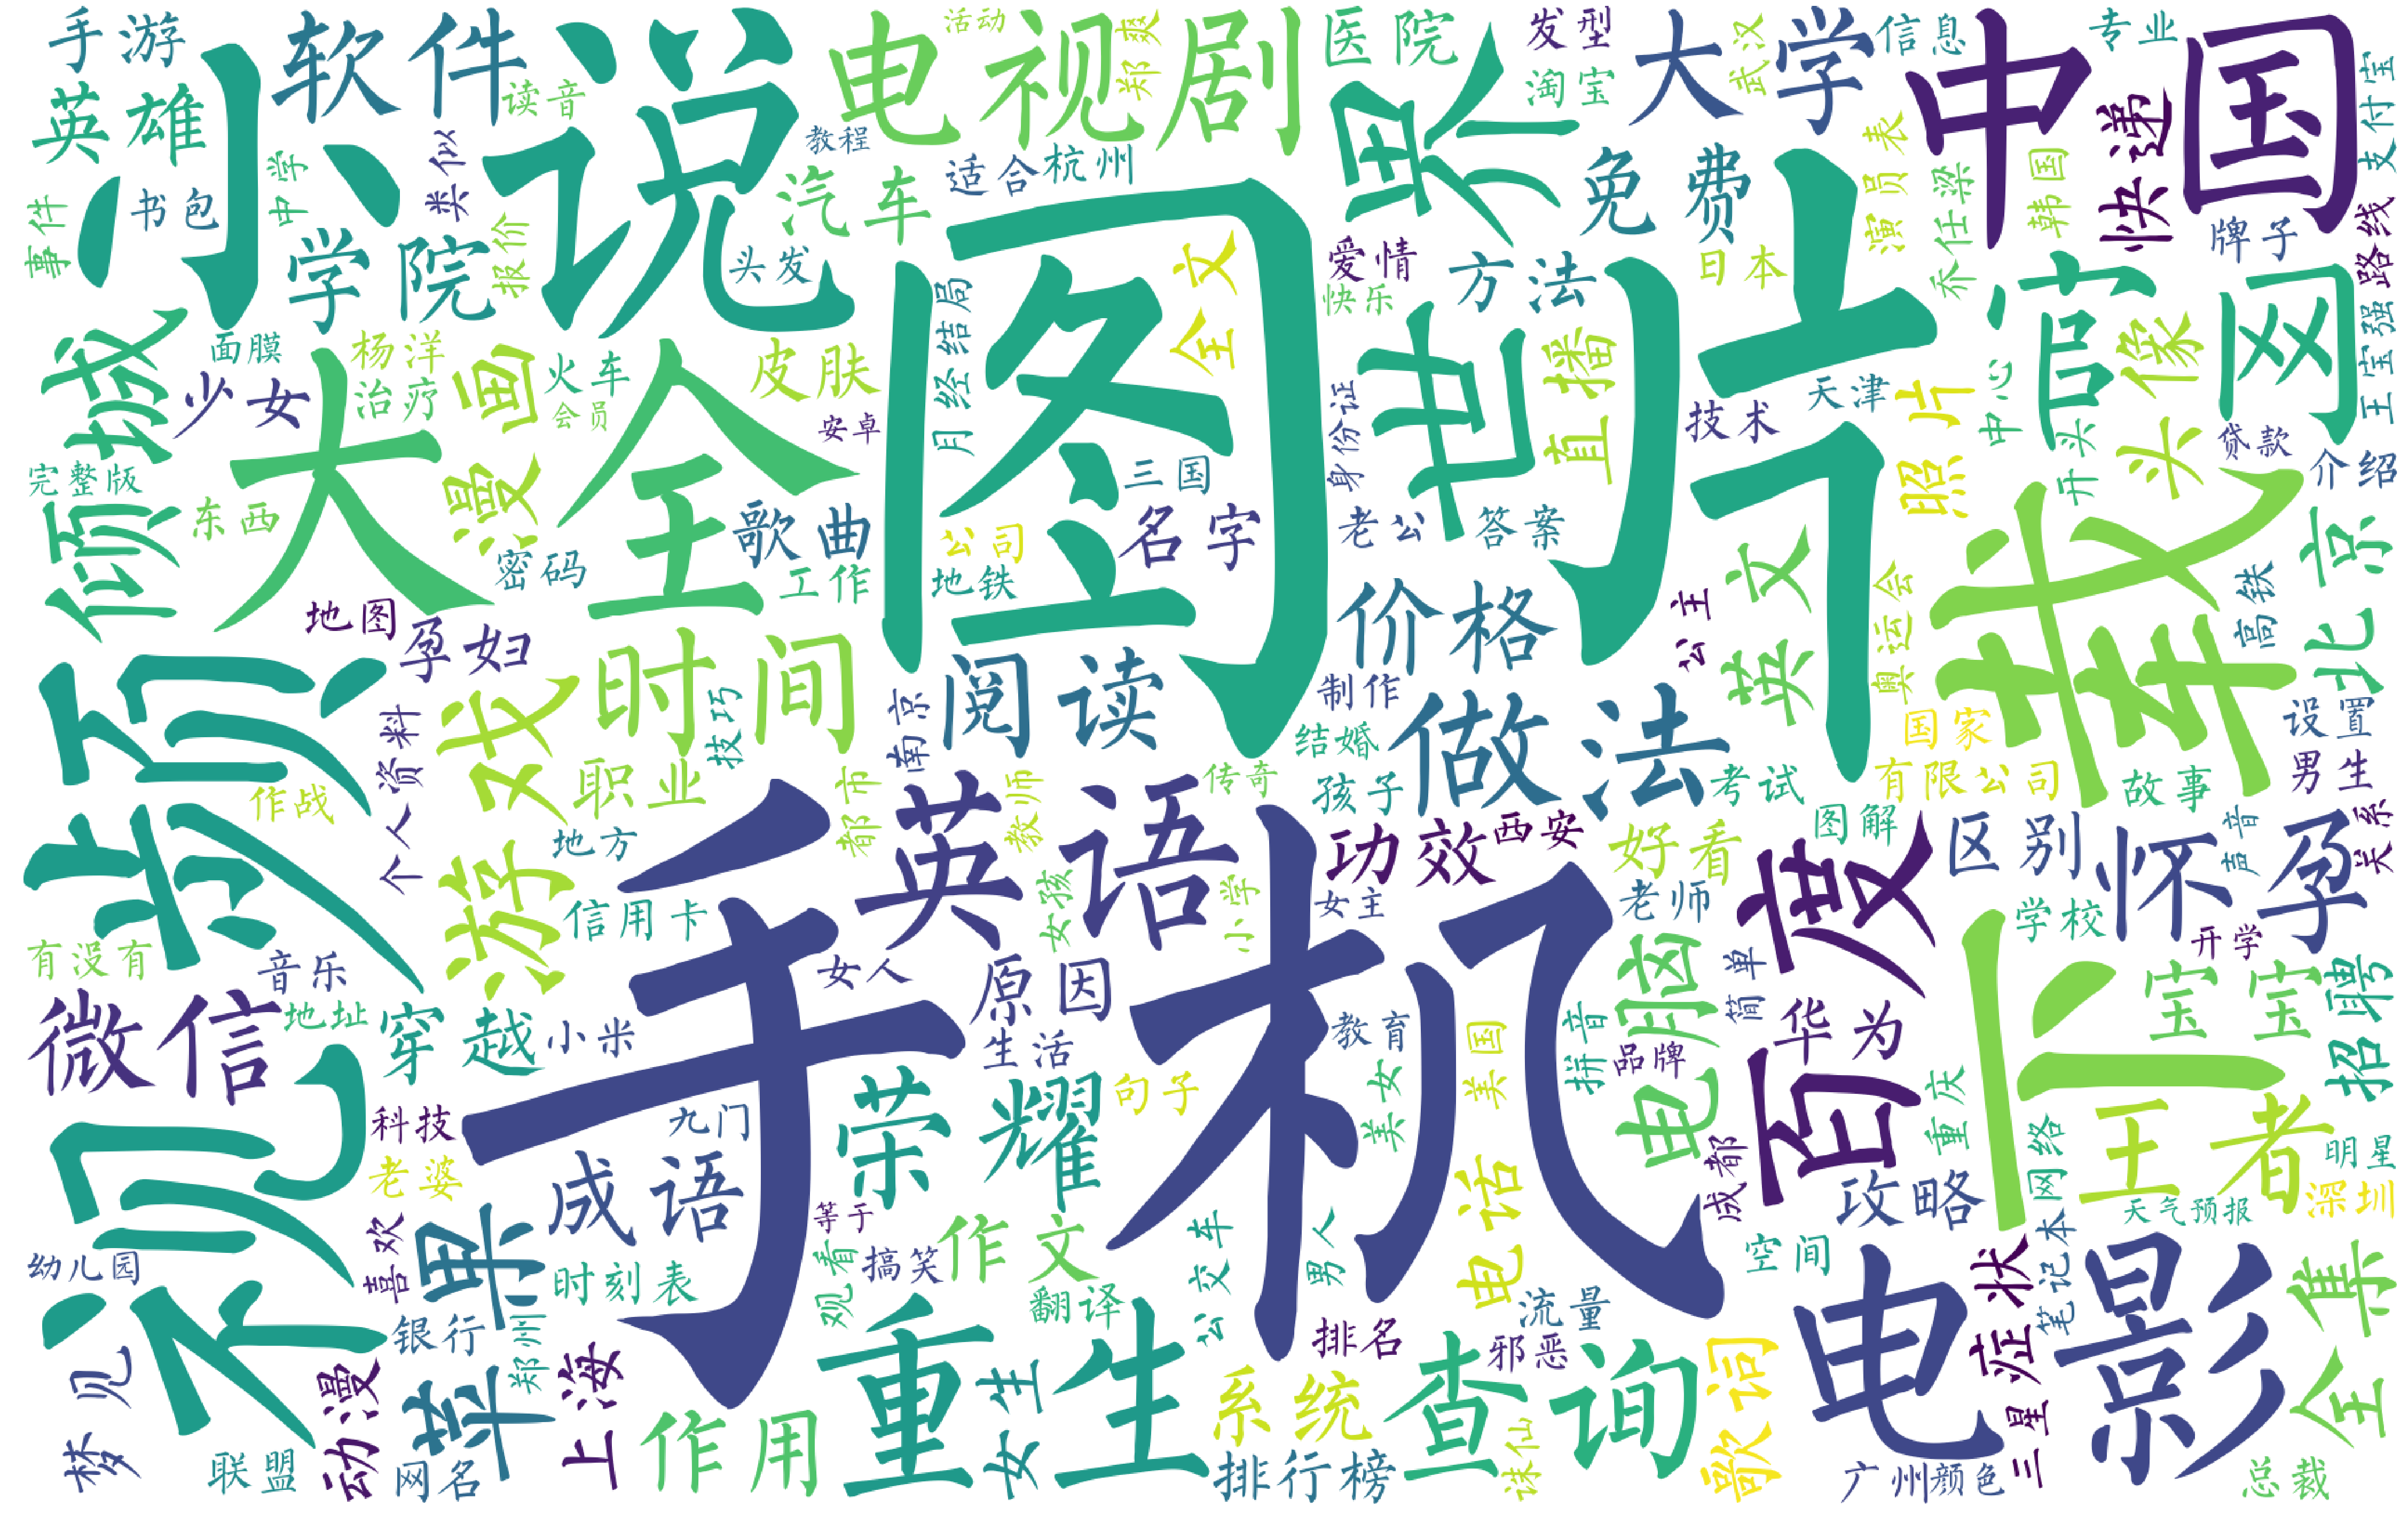

In [12]:
from wordcloud import WordCloud

wc = (WordCloud(font_path='方正苏新诗柳楷简体.ttf', \
                background_color='white', \
                random_state=42, \
                width=1900, height=1200, stopwords=stop_words_list).generate(' '.join(top1000[0])))

plt.figure(figsize=(80, 60))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [32]:
model = word2vec.Word2Vec(words_list, size=300, window=10, workers=4) 

In [33]:
savepath = '10w_word2vec_' + '300'+'.model'
model.save(savepath)

In [7]:
model = gensim.models.Word2Vec.load('10w_word2vec_300.model')

### 使用Gensim库建立word2vec词向量模型
### 参数定义：
-  sentences：可以是一个list
-  sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
-  size：是指特征向量的维度，默认为100。大的size需要更多的训练数据,但是效果会更好. 推荐值为几十到几百。
-  window：表示当前词与预测词在一个句子中的最大距离是多少
-  alpha: 是学习速率
-  seed：用于随机数发生器。与初始化词向量有关。
-  min_count: 可以对字典做截断. 词频少于min_count次数的单词会被丢弃掉, 默认值为5
-  max_vocab_size: 设置词向量构建期间的RAM限制。如果所有独立单词个数超过这个，则就消除掉其中最不频繁的一个。每一千万个单词需要大约1GB的RAM。设置成None则没有限制。

-  workers参数控制训练的并行数。
-  hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（defau·t），则negative sampling会被使用。
-  negative: 如果>0,则会采用negativesamp·ing，用于设置多少个noise words
-  iter： 迭代次数，默认为5

In [34]:
model.wv.most_similar("大哥")

C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('大嫂', 0.5543593764305115),
 ('黑社会', 0.5290218591690063),
 ('老大', 0.4860628843307495),
 ('二哥', 0.4486938714981079),
 ('山鸡', 0.44597119092941284),
 ('乔四', 0.44301217794418335),
 ('四爷', 0.4358714818954468),
 ('哥', 0.4296860098838806),
 ('王小源', 0.4242296814918518),
 ('厨子', 0.4235823452472687)]

In [35]:
model.wv.most_similar("吴亦凡")

[('黄子韬', 0.6808489561080933),
 ('郑秀晶', 0.5988118648529053),
 ('崔胜贤', 0.5945185422897339),
 ('权志龙', 0.585346519947052),
 ('张艺兴', 0.5660295486450195),
 ('吴世勋', 0.5633226037025452),
 ('鹿晗', 0.5629131197929382),
 ('黄子', 0.5603655576705933),
 ('朴灿烈', 0.5527365207672119),
 ('灿烈', 0.550940990447998)]

In [38]:
model.wv.most_similar("吉林大学")

[('黑大', 0.6623995304107666),
 ('命案', 0.6591060161590576),
 ('华中科技大学', 0.6194504499435425),
 ('东北大学', 0.61212557554245),
 ('大连理工大学', 0.607897162437439),
 ('兰州大学', 0.606408953666687),
 ('西北工业大学', 0.6043800115585327),
 ('南京师范大学', 0.593320369720459),
 ('首都师范大学', 0.5919362902641296),
 ('西北农林科技大学', 0.5869364142417908)]

In [12]:
X_df.dropna(how='any', axis=0, inplace=True)
X_df.shape 

(99993, 303)

In [16]:
X_df.to_csv('features.csv', index=False)

In [13]:
age_mask = X_df['age'] != 0
X_a = X_df.loc[age_mask, :]
print(X_a.shape)

gender_mask = X_df['gender'] != 0
X_g = X_df.loc[gender_mask, :]
print(X_g.shape)

education_mask = X_df['education'] != 0
X_e = X_df.loc[education_mask, :]
print(X_e.shape)

(98327, 303)
(97838, 303)
(90714, 303)


In [14]:
X_a.to_csv('X_a.csv', index=False)
X_g.to_csv('X_g.csv', index=False)
X_e.to_csv('X_e.csv', index=False)

In [33]:
X_a['age'].describe()

count    98327.000000
mean         2.117577
std          1.162550
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: age, dtype: float64

In [34]:
X_g['gender'].describe()

count    97838.000000
mean         1.417711
std          0.493185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: gender, dtype: float64

In [35]:
X_e['education'].describe()

count    90714.000000
mean         4.302599
std          0.914412
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: education, dtype: float64